<a href="https://colab.research.google.com/github/wenxuan0923/My-notes/blob/master/SVD_intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intuition behind Singular Value Decomposition

In my note <a target='_blank' href='#'>Intuition behind Eigenvalue, Eigenvector and Eigendecomposition</a>, I explained the method of Eigendecomposition using visualization. We have seen that it's a powerful tool to aprroximate the original symmetric matrix with lower dimension data. However, it only work for symmetric matrix. In this note I will show you how to apply **Singular Value Decomposition** to solve this method.

Recall that in the note of Eigendecomposition, we have learned that: 

- **A symmetric matrix transforms a vector by stretching or shrinking it along its eigenvectors by its corresponding eigenvalues**

- **A $n×n$ symmetric matrix has $n$ linearly independent eigenvectors and are perpendicular to each other and form orthogonal vectors**

To find the counterpart for a **non-symmetric** matrix, we need to find the directions (linearly independent orthogonal vectors) to stretch or shrink the vector and the corresponding magnitudes. The first direction of streching can be defined as the direction of the vector which has the greatest length: 

<br>$$d_1 = \underset{x}{\mathrm{max}}||Ax||$$<br>

The second direction of stretching is the maximum of $||Ax||$ over all vectors in $x$ which are perpendicular to direction 1.

<br>$$d_2 = \underset{x}{\mathrm{max}}||Ax||$$<br>
subject to the constraint:
<br>$$d_2\perp d_1$$<br>

We are actually trying to solve the optimization problem:

<br>$$d_k =\underset{x}{\mathrm{max}}||Ax||$$<br>

subject to the constraints:

$$d_k\perp d_1, \quad d_k\perp d_2, \quad ... \quad, d_k\perp d_{k-1}$$<br>

Now suppose $A$ is a $m*n$ matrix, then $A^TA$ is an $n*n$ symmetric matrix. This is because the transpose of this matrix is equal to itself:

<br>$$(A^TA)^T = A^TA$$<br>

Thus, it has $n$ real eigenvalues and $n$ linear independent and orthogonal eigenvectors which can form a basis for the $n$-element vectors that it can transform (in $R^n$ space). Let call these (normalized) eigenvectors $v_1$, $v_2$, … , $v_n$ and the corresponding eigenvalues $\lambda_1$, $\lambda_2$, ...,$\lambda_n$. So we have:

<br>$$A^TAv_i = \lambda_iv_i$$<br>

For each of these eigenvectors we can use the l2 norm: 

<br> $$||Av_i||^2 = (Av_i)^TAv_i = v_i^TA^TAv_i = v_i^T\lambda_iv_i = \lambda_iv_i^Tv_i= \lambda_i$$<br>

Note: 

$$||x|| = \sqrt{(|x_1|^{2} + |x_2|^{2} + ... + |x_n|^{2})}$$<br>

This result shows that all the eigenvalues are positive. Now assume that we label them in decreasing order, so:

<br>$$\lambda_1 \geq \lambda_2 \geq ... \geq \lambda_n \geq 0$$<br>

Now we define the **Singular Value** of $A$ as the square root of $\lambda_i$ (eigenvector of $A^TA$) and denote it as $\sigma_i$. Then we have:

<br>$$\sigma_i = \sqrt{\lambda_i} = ||Av_i||$$<br>
$$\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_n \geq 0 $$<br>

So the singular values $\sigma_i$ of $A$ are the length (defined by l2 norm) of vectors $Av_i$, and:


<br>$$||Av_1|| \geq ||Av_2|| \geq ... \geq ||Av_n|| \geq 0 $$<br>

Till now you may noticed, the solution to the problem we are trying to solve:

<br>$$d_k =\underset{x}{\mathrm{max}}||Ax||$$

subject to the constraints:

$$d_k\perp d_1, \quad d_k\perp d_2, \quad ... \quad, d_k\perp d_{k-1}$$<br>

is actually $Av_k$, and the corresponding maximum magnitude is $\sigma_k$. Actually the set $\{Av_1, Av_2,..., Av_n\}$ is an orthogonal basis for $Ax$, so the vectors $Av_i$ are indeed perpendicular to each other.

**An explicit example for illustration:**



In [65]:
import numpy as np
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn-whitegrid')

In [66]:
# non-symmetric matrix 
A = np.array([[1, 2],
              [3, 0.2]]) 

# unit circle
x = np.cos(np.linspace(0, 2*np.pi, num=360))
y = np.sin(np.linspace(0, 2*np.pi, num=360)) 
orignal_data = np.column_stack([x, y])
scaled_data = np.matmul(A, orignal_data.T).T

# get eigenvalues & eigenvectors of A^TA
w, v = LA.eig(np.matmul(A.T, A))
print(w)
print(v)

[10.97479456  3.06520544]
[[ 0.9363535  -0.35105858]
 [ 0.35105858  0.9363535 ]]


In [67]:
lambda1, lambda2 = w[0], w[1]
v1 = np.array([vec[0] for vec in v])
v2 = np.array([vec[1] for vec in v])
Av1 = np.matmul(A, v1)
Av2 = np.matmul(A, v2)

Check that:
$$\sqrt{\lambda_1} = \sigma_1 = ||Av_1|| \qquad \sqrt{\lambda_2} = \sigma_2 = ||Av_2||$$

In [62]:
print(np.linalg.norm(Av1))
print(np.sqrt(lambda1))

3.3128227478250976
3.312822747825098


In [64]:
print(np.linalg.norm(Av2))
print(np.sqrt(lambda2))

1.7507728126437667
1.7507728126437672


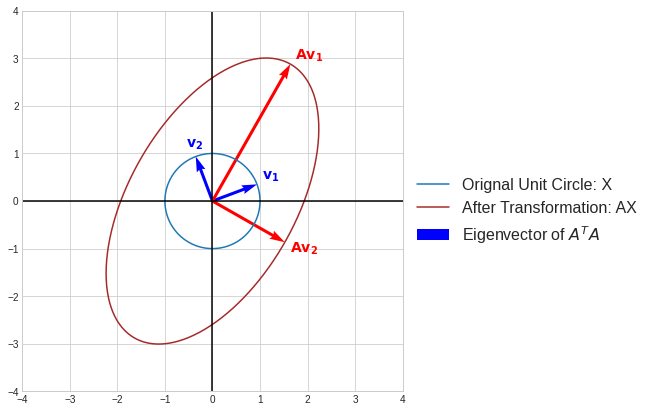

In [68]:
# Visualization
origin = [0], [0]  
fig = plt.figure(figsize=(10, 7)) 
ax1 = fig.add_subplot(1, 1, 1)  
ax1.plot(orignal_data[:,0], orignal_data[:,1], label='Orignal Unit Circle: X')
ax1.plot(scaled_data[:,0], scaled_data[:,1], color='brown', label='After Transformation: AX')
ax1.quiver(*origin, v1[0], v1[1], 
          color='blue', scale_units='xy', 
          width=0.008, angles='xy', scale=1, label='Eigenvector of $A^TA$')
ax1.quiver(*origin, v2[0], v2[1], 
          color='blue', scale_units='xy', linewidth=1,
          width=0.008, angles='xy', scale=1)
ax1.quiver(*origin, Av1[0], Av1[1], 
          color='red', scale_units='xy', 
          width=0.008, angles='xy', scale=1)
ax1.quiver(*origin, Av2[0], Av2[1], 
          color='red', scale_units='xy', linewidth=1,
          width=0.008, angles='xy', scale=1)

ax1.text(v1[0] + 0.1, v1[1] + 0.1, "$\mathbf{v_1}$", color='blue', fontsize=14)
ax1.text(v2[0] - 0.2, v2[1] + 0.2, "$\mathbf{v_2}$", color='blue', fontsize=14)
ax1.text(Av1[0] + 0.1, Av1[1] + 0.1, "$\mathbf{Av_1}$", color='red', fontsize=14)
ax1.text(Av2[0] + 0.1, Av2[1] - 0.2, "$\mathbf{Av_2}$", color='red', fontsize=14)

ax1.set_xlim([-4, 4])
ax1.set_ylim([-4, 4])
ax1.set_aspect('equal')
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
plt.legend(fontsize='16', bbox_to_anchor=(1, 0, 0.5, 0.6))
plt.show()

**To summarize everything above:**

If $v_i$ is the eigenvector of $A^TA$ (ordered based on its corresponding singular value), and assuming that $||x||=1$, then $Av_i$ is showing a direction of stretching for $Ax$. The corresponding singular value $\sigma_i$ (square root of eigenvalue $\lambda_i$ of $A^TA$) gives the length of $Av_i$. Now we are ready to learn about **Singular Value Decomposition** (SVD)

## Singular Value Decomposition

Let A be an $m×n$ matrix and rank $r$ with singular values :

$$\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_r$$<br>

These singular values correspond to eigenvectors $v_i$ of $A^TA$ at the same order. $A$ can be decomposed as:

<br>$$A = U\Sigma V^T$$

with dimension:

$$(m\times n) = (m\times m) * (m\times n) * (n\times n)$$<br>

We already know that the set $\{Av_1, Av_2, …, Av_r\}$ is an orthogonal basis for $Ax$, and $\sigma_i = ||Av_i||$. So we can normalize the $Av_i$ vectors by dividing them by their length:

<br>$$U = \begin{bmatrix} u_1 & u_2 & ... & u_m \end{bmatrix}$$<br>

where $\{ u_1,  u_2, ... , u_r \}$ is an orthonormal basis for $Ax$:

<br>$$u_i = \frac{Av_i}{||Av_i||} = \frac{Av_i}{\sigma_i} \qquad \text{for  } i \leq r$$<br>

$\Sigma$ is an $m×n$ diagonal matrix of the form:


$$\Sigma = \begin{bmatrix}
\sigma_1 & 0 & ... & 0 & 0 & ... & 0 \\
0 & \sigma_2 & ... & 0 & 0 & ... & 0 \\
\vdots & \vdots & ... & \vdots & \vdots & ... & \vdots \\
0 & 0 & ... & 0 & 0 & ... & 0 \\
0 & 0 & ... & \sigma_r & 0 & ... & 0 \\
0 & 0 & ... & 0 & 0 & ... & 0 \\
\vdots & \vdots & ... & \vdots & \vdots & ... & \vdots \\
0 & 0 & ... & 0 & 0 & ... & 0
\end{bmatrix}
$$<br>

$V$ is an $n×n$ matrix that its columns are $v_i$.

$$V = \begin{bmatrix} v_1 & v_2 & ... & v_n \end{bmatrix}$$

Thus, $A$ can be decomposed as:

<br>$$\begin{align}
A &= \begin{bmatrix} u_1 & u_2 & ... & u_m \end{bmatrix} \begin{bmatrix}
\sigma_1 & 0 & ... & 0 & 0 & ... & 0 \\
0 & \sigma_2 & ... & 0 & 0 & ... & 0 \\
\vdots & \vdots & ... & \vdots & \vdots & ... & \vdots \\
0 & 0 & ... & 0 & 0 & ... & 0 \\
0 & 0 & ... & \sigma_r & 0 & ... & 0 \\
0 & 0 & ... & 0 & 0 & ... & 0 \\
\vdots & \vdots & ... & \vdots & \vdots & ... & \vdots \\
0 & 0 & ... & 0 & 0 & ... & 0
\end{bmatrix}\begin{bmatrix} v_1^T \\ v_2^T \\ \vdots 
\\ v_n^T \end{bmatrix} \\ \\
&= \begin{bmatrix}\sigma_1u_1 & \sigma_2u_2 & ... & \sigma_ru_r & 0 & ... & 0\end{bmatrix}\begin{bmatrix} v_1^T \\ v_2^T \\ \vdots \\ v_n^T \end{bmatrix} \\ \\
&=\sigma_1u_1v_1^T + \sigma_2u_2v_2^T +...+ \sigma_ru_rv_r^T\end{align}$$


When we apply matrix $A$ to some vector $x$:

<br>$$Ax= \sigma_1u_1v_1^Tx + \sigma_2u_2v_2^Tx +...+ \sigma_ru_rv_r^Tx\$$<br>

since we know that $\{ u_1,  u_2, ... , u_r \}$ is an orthonormal basis for $Ax$, we can also represent it as:

<br>$$Ax = a_1u_1 + a_2u_2 + ... + a_ru_r$$<br>

Each term (scalar) $a_i$ equals to the dot product of $Ax$ and $u_i$ (projection of $Ax$ onto $u_i$), that is:

<br>$$a_i = (Ax)^Tu_i = x^TA^Tu_i$$

Thus, <br>

$$a_i = \frac{x^TA^TAv_i}{\sigma_i} \quad \text{since } \quad u_i = \frac{Av_i}{\sigma_i} $$<br>

Since $v_i$ is the eigenvector of $A^TA$, we have

<br>$$A^TAv_i = \lambda_iv_i = \sigma_i^2vi$$

So scalars $a_i$ are:

$$a_i = \frac{x^T\sigma_i^2vi}{\sigma_i} = x^T\sigma_iv_i = \sigma_ix^Tv_i = \sigma_iv_i^Tx \quad \text{(since } \sigma_i \text{ is a scalar)}$$<br>

Then we can re-write the expression of $Ax$:

<br>$$\begin{align}Ax &= \sigma_1v_1^Txu_1 + \sigma_2v_2^Txu_2 + ... + \sigma_rv_r^Txu_r \\ \\
&= \sigma_1u_1v_1^Tx + \sigma_2u_2v_2^Tx + ... + \sigma_ru_rv_r^Tx \end{align}$$<br>

where $\sigma_iv_i^Tx$ is the scalar projection of $x$ onto $u_i$.

**Let's visualize the whole thing with a concrete example:**


In [196]:
A = np.array([[4, 1],
              [3, -1]])
# unit circle
x = np.cos(np.linspace(0, 2*np.pi, num=360))
y = np.sin(np.linspace(0, 2*np.pi, num=360)) 
orignal_data = np.column_stack([x, y])
scaled_data = np.matmul(A, orignal_data.T).T

# Calculate eigenvalues and eigenvectors of A^TA
w, v = LA.eig(np.matmul(A.T, A))
print(w)
print(v)

[25.04339638  1.95660362]
[[ 0.9990597  -0.04335558]
 [ 0.04335558  0.9990597 ]]


In [197]:
# Eigenvalues of A^TA
lambda1, lambda2 = w[0], w[1]
# Eigenvectors of A^TA
v1 = np.array([vec[0] for vec in v])
v2 = np.array([vec[1] for vec in v])
# Singular values of A
sigma1, sigma2 = np.sqrt(lambda1), np.sqrt(lambda2)
# Av1 and Av2 show the directions of stretching of Ax
Av1 = np.matmul(A, v1)
Av2 = np.matmul(A, v2)
# u1 and u2 are the unit vectors of Av1 and Av2
u1 = Av1/sigma1
u2 = Av2/sigma2
# a random point for illustration 
ex = orignal_data[60]
Aex = np.matmul(A, ex)
# Orthogonal projection of Ax1 onto u1 and u2 
proj1 = sigma1 * np.dot(v1, ex) * u1
proj2 = sigma2 * np.dot(v2, ex) * u2

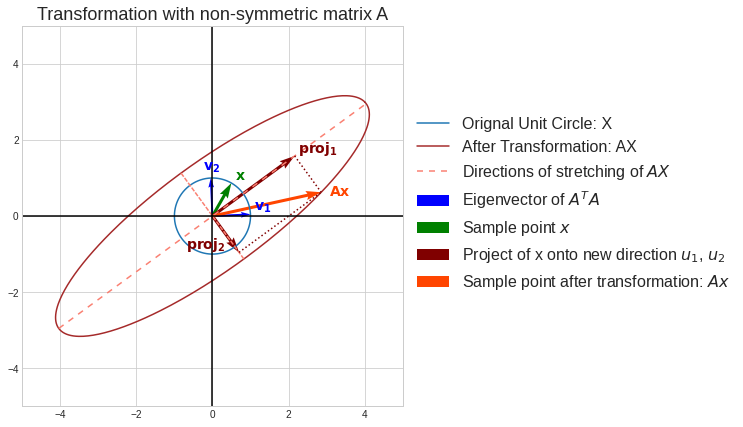

In [184]:
# Visualization
origin = [0], [0]  
fig = plt.figure(figsize=(10, 7)) 
ax1 = fig.add_subplot(1, 1, 1)  
ax1.plot(orignal_data[:,0], orignal_data[:,1], 
         label='Orignal Unit Circle: X')
ax1.plot(scaled_data[:,0], scaled_data[:,1], 
         color='brown', label='After Transformation: AX')
ax1.quiver(*origin, v1[0], v1[1], 
          color='blue', scale_units='xy', 
          width=0.005, angles='xy', scale=1, 
           label='Eigenvector of $A^TA$')
ax1.quiver(*origin, v2[0], v2[1], 
          color='blue', scale_units='xy', linewidth=1,
          width=0.005, angles='xy', scale=1)
ax1.quiver(*origin, ex[0], ex[1], 
          color='green', scale_units='xy', 
          width=0.008, angles='xy', scale=1, 
           label='Sample point $x$')
ax1.quiver(*origin, proj1[0], proj1[1], 
          color='maroon', scale_units='xy', 
          width=0.008, angles='xy', scale=1, 
           label='Project of x onto new direction $u_1$, $u_2$')
ax1.quiver(*origin, proj2[0], proj2[1], 
          color='maroon', scale_units='xy', linewidth=1,
          width=0.008, angles='xy', scale=1)
ax1.quiver(*origin, Aex[0], Aex[1], 
          color='orangered', scale_units='xy', linewidth=1,
          width=0.008, angles='xy', scale=1, 
           label='Sample point after transformation: $Ax$')

ax1.text(v1[0] + 0.1, v1[1] + 0.1, "$\mathbf{v_1}$", color='blue', fontsize=14)
ax1.text(v2[0] - 0.2, v2[1] + 0.2, "$\mathbf{v_2}$", color='blue', fontsize=14)
ax1.text(proj1[0] + 0.1, proj1[1] + 0.1, "$\mathbf{proj_1}$", color='maroon', fontsize=14)
ax1.text(proj2[0] - 1.4, proj2[1] + 0.1, "$\mathbf{proj_2}$", color='maroon', fontsize=14)
ax1.text(ex[0] + 0.1, ex[1] + 0.1, "$\mathbf{x}$", color='green', fontsize=14)
ax1.text(Aex[0] + 0.2, Aex[1] - 0.1, "$\mathbf{Ax}$", color='orangered', fontsize=14)

ax1.plot([-Av1[0], Av1[0]], [-Av1[1], Av1[1]], 
          color='salmon', linestyle='-.', 
         dashes=[4, 4], label='Directions of stretching of $AX$')
ax1.plot([-Av2[0], Av2[0]], [-Av2[1], Av2[1]], 
          dashes=[3, 1], 
          color='salmon', linestyle='-.')

ax1.plot([proj1[0], Aex[0]], [proj1[1], Aex[1]],
         linestyle=':', color='maroon')
ax1.plot([proj2[0], Aex[0]], [proj2[1], Aex[1]],
         linestyle=':', color='maroon')

ax1.set_xlim([-5, 5])
ax1.set_ylim([-5, 5])
ax1.set_aspect('equal')
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
plt.legend(fontsize='16', bbox_to_anchor=(1, 0, 0.6, 0.8))
ax1.set_title('Transformation with non-symmetric matrix A', fontsize=18)
plt.show()

To summarize the procedured required to calculate $Ax$ using the SVD method.

1. Calculate eigenvalues: $\lambda_1$, $\lambda_2$ and eigenvectors $v_1$, $v_2$ of $A^TA$

2. Calculate singular value of $A$, which is the square root of eigenvalues: $\sigma_1 = \sqrt{\lambda_1}$, $\sigma_2 = \sqrt{\lambda_2}$.

3. Calculate the directions of stretching of $Ax$, which are $Av_1$ and $Av_2$

4. Get the orthonormal basis for $Ax$: $\{u_1 = \frac{Av_1}{\sigma_1}$, $u_2 = \frac{Av_2}{\sigma_2}\}$ 

5. Get the orthogonal projection of $Ax$ onto $u_1$ and $u_2$:  $\sigma_1u_1v_1^Tx$ and $\sigma_2u_2v_2^Tx$

6. Add the projection vectors together, we get the final result: $Ax = \sigma_1u_1v_1^Tx + \sigma_2u_2v_2^Tx$

Now let's see how to calculate the SVD of a matrix in Python using Numpy.




## Singular Value Decomposition with Numpy

In [215]:
U, s, Vh = LA.svd(A)
print('U: ', U, '\n')
print('s: ', s, '\n')
print('Vh: ', Vh)

U:  [[-0.80721858 -0.59025263]
 [-0.59025263  0.80721858]] 

s:  [5.00433776 1.39878648] 

Vh:  [[-0.9990597  -0.04335558]
 [ 0.04335558 -0.9990597 ]]


**Two things to notice here:**

- `s` conly contain the value for the main diagonal items for matrix $\Sigma$

- `Vh` is actually the $V^T$ part in expression $A = U\Sigma V^T$, we don't need to do the transpose

Check the following example to see how to construct $\Sigma$ from $s$.


In [212]:
A

array([[ 4,  1],
       [ 3, -1]])

In [211]:
Sigma = np.zeros(A.shape)
for i in range(min(A.shape)):
    Sigma[i, i] = s[i]
np.matmul(U, np.matmul(Sigma, Vh))

array([[ 4.,  1.],
       [ 3., -1.]])

Similar to the eigendecomposition method, we can approximate our original symmetric matrix A by summing the terms which have the highest singular values. So we can use the first $k$ terms in the SVD equation, using the $k$ highest singular values which means we only include the first $k$ vectors in $U$ and $V$ matrices in the decomposition equation:

<br>$$\begin{align}
A \approx A_k &= \begin{bmatrix} u_1 & u_2 & ... & u_k \end{bmatrix} \begin{bmatrix}
\sigma_1 & 0 & ... & 0  \\
0 & \sigma_2 & ... & 0   \\
\vdots & \vdots & ... & \vdots \\
0 & 0 & ... & \sigma_k 
\end{bmatrix}\begin{bmatrix} v_1^T \\ v_2^T \\ \vdots 
\\ v_k^T \end{bmatrix} \\ \\
&=\sigma_1u_1v_1^T + \sigma_2u_2v_2^T +...+ \sigma_ku_kv_k^T\end{align}$$<br>

Now we are ready to use SVD to perform Dimensionality reduction!


Reference:

<a target='_blank' href='https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d'>Understanding Singular Value Decomposition and its Application in Data Science</a>